<a href="https://colab.research.google.com/github/DarshitaUdani/Gold-Price-Prediction/blob/main/goldpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics # Removed incorrect import

In [ ]:
gold_data=pd.read_csv('/content/gold.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
gold_data.describe()
# the percentile tells where the value lies

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
# correlation tells the relation between columns
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

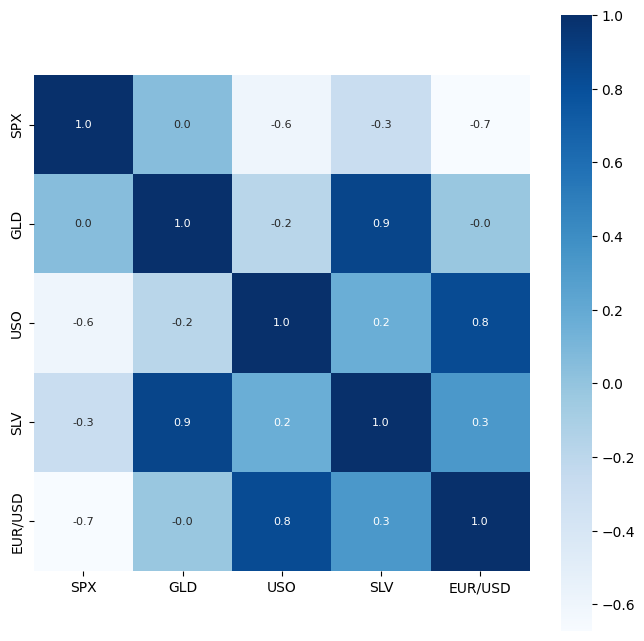

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#positive correralation means it is proportional

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


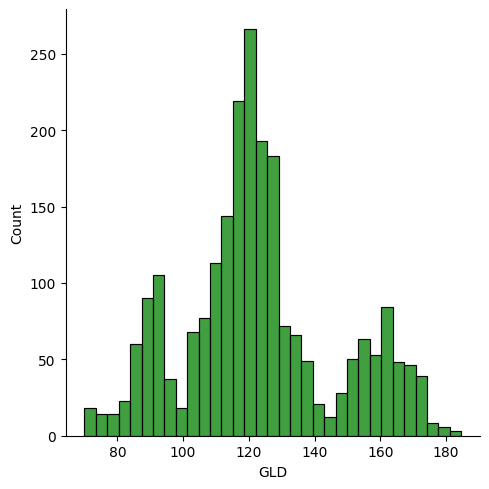

In [ ]:
sns.displot(gold_data['GLD'], color='green')

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)#axis is 1 to show that you are dropping a column

In [ ]:
Y=gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.62059953  82.00369975 116.37810044 127.65270083 120.85770141
 154.84569778 150.23079876 126.05550033 117.37819873 126.32800024
 116.88050105 171.79280075 141.53939959 167.48019894 115.12170037
 117.5609003  138.44830293 170.15610098 159.46680331 159.5885001
 155.25510063 125.48919999 175.43150036 157.14240377 125.19800075
  93.90639977  77.2325001  120.36449978 119.24060007 167.40940017
  88.08530054 125.13799975  91.069301   117.71540061 121.09009887
 135.78810063 115.42670124 115.58800097 147.79399948 106.89620134
 104.09740245  87.19999805 126.56840042 117.63939962 154.80129898
 119.4644002  108.47149978 108.07339812  93.15310045 127.32179707
  74.7981002  113.6108992  121.24870015 111.40179895 118.89829878
 120.666799   159.46429942 168.29670119 146.79769698  85.81379854
  94.25730031  86.81589879  90.74150044 118.97570073 126.42160038
 127.46189997 170.88380009 122.25019951 117.38419925  98.74860018
 168.26730133 142.93319711 131.71550182 121.13750227 121.41849934
 119.737800

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.9888871131650456


In [ ]:
Y_test=list(Y_test)

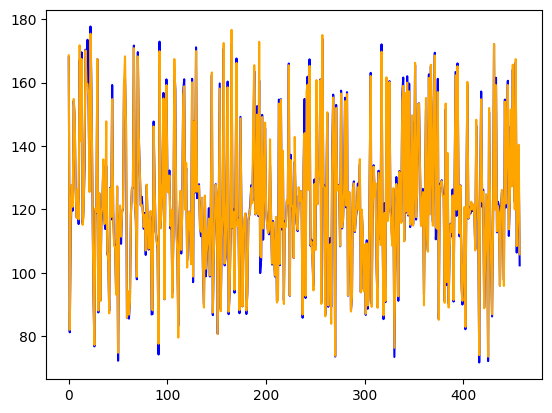

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='orange',label='Predicted Value')